# Intro to Exploratory Data Analysis (EDA) in Python

EDA?
Exploratory Data Analysis (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually.
This step is very important especially when we arrive at modeling the data in order to apply Machine Learning.
Plotting in EDA consists of Histogram,Box Plot,Scatter plot and many more. It often takes much time to explore the data.
Through the process of EDA , We can ask to define the problem statement or Definationon our data set which is very important.

How to perform EDA -
This is one such question that everyone is keen on knowing the answer. Well the answer is it depends on the data set that you are working.
There is no one method or common methods in order to perform EDA, Whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process


What data are we exploring today?
I got a very beautiful data-set of cars from Kaggle. The data-set can be downloaded from here.(dataset will be uploaded)
To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. 

1.Importing the requried libraries for EDA

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

2.loading data to dataframe

In [29]:
df=pd.read_csv("D:/Projects and All/gitupload/upload-folders/DataScienceProject/IBMDataSciecneNotes/EDA-Exploratory Data Analysis/dataofCars.csv")
#to display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [30]:
#to display the tail
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


3. Checking the types of  data

In [31]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

4. Dropping irrelevant columns 
This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [32]:
df=df.drop(['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size'],axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


5. Renaming the columns 
In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [33]:
df=df.rename(columns={"Engine HP":"HP",
                      "Engine Cylinders":"Cylinders",
                      "Transmission Type":"Transmission",
                      "Driven_wheels":"Drive Mode",
                      "Highway MPG":"MPG-H",
                      "city mpg":"MPG-C",
                      "MSRP":"Price"
                     })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,highway MPG,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


6.Dropping Duplicate Rows 

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [34]:
df.shape

(11914, 10)

In [35]:
duplicate_rows_df=df[df.duplicated()]
print("Number of Duplicate rows:",duplicate_rows_df.shape)

Number of Duplicate rows: (989, 10)


In [36]:
df.count() #used to count the number of rows

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Driven_Wheels    11914
highway MPG      11914
MPG-C            11914
Price            11914
dtype: int64

In [37]:
df=df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,highway MPG,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [38]:
df.count()

Make             10925
Model            10925
Year             10925
HP               10856
Cylinders        10895
Transmission     10925
Driven_Wheels    10925
highway MPG      10925
MPG-C            10925
Price            10925
dtype: int64

7.Dropping the missing or Null Values

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values

In [39]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
highway MPG       0
MPG-C             0
Price             0
dtype: int64


This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

In [40]:
df=df.dropna() #dropping the missing values
df.count()

Make             10827
Model            10827
Year             10827
HP               10827
Cylinders        10827
Transmission     10827
Driven_Wheels    10827
highway MPG      10827
MPG-C            10827
Price            10827
dtype: int64

Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

8.Detecting Outliers

<Axes: xlabel='Price'>

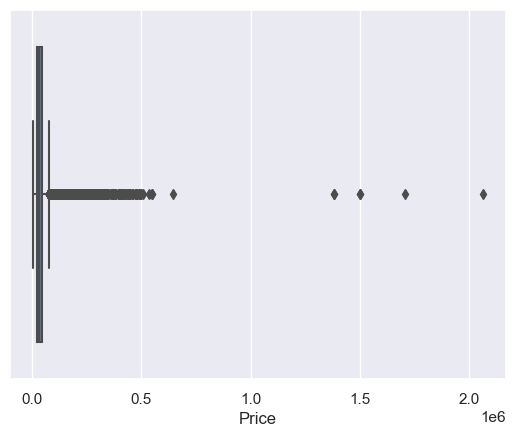

In [41]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

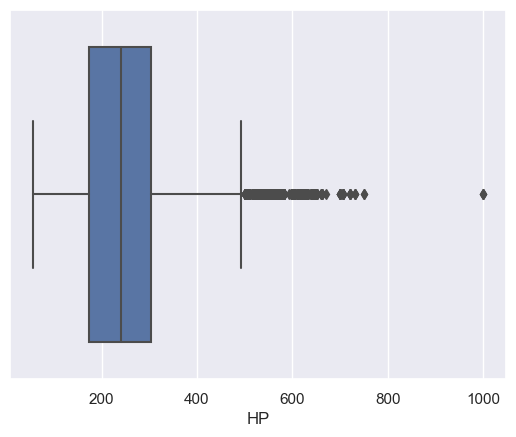

In [42]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

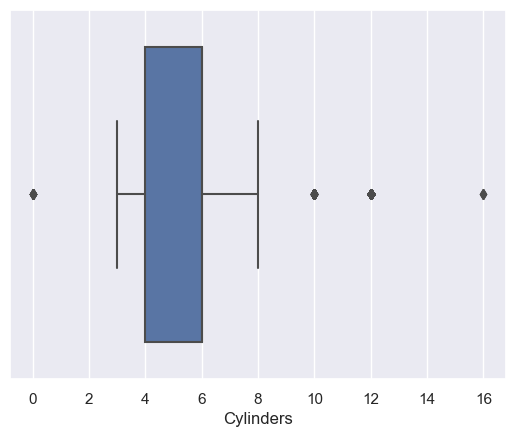

In [43]:
sns.boxplot(x=df['Cylinders'])

In [44]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year               9.0
HP               130.0
Cylinders          2.0
highway MPG        8.0
MPG-C              6.0
Price          21327.5
dtype: float64


C:\Users\offic\AppData\Local\Temp\ipykernel_14672\2377082437.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(0.25)
C:\Users\offic\AppData\Local\Temp\ipykernel_14672\2377082437.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df.quantile(0.75)


In [45]:
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

C:\Users\offic\AppData\Local\Temp\ipykernel_14672\1699577214.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(9191, 10)

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.

9.Plot Different features against one another(scatter),against frequency(histogram)

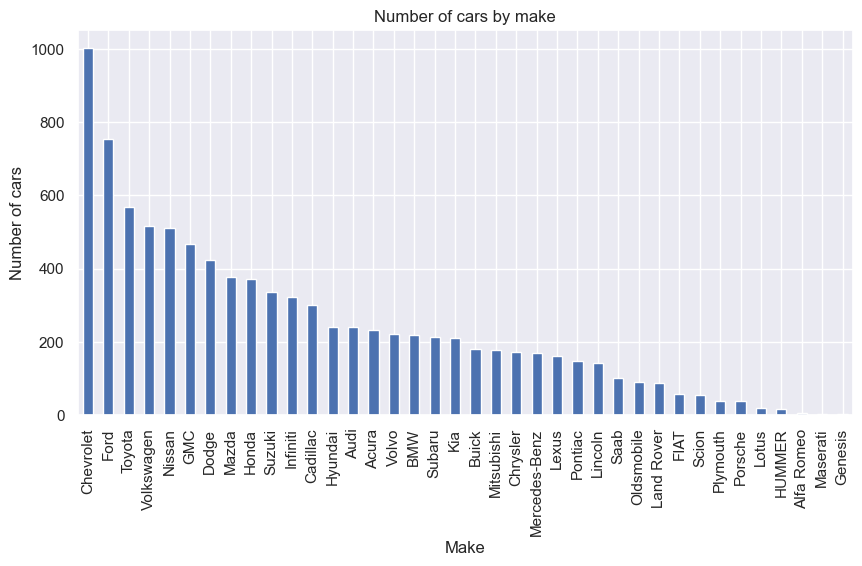

In [49]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make');

C:\Users\offic\AppData\Local\Temp\ipykernel_14672\2770685803.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,Year,HP,Cylinders,highway MPG,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
highway MPG,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


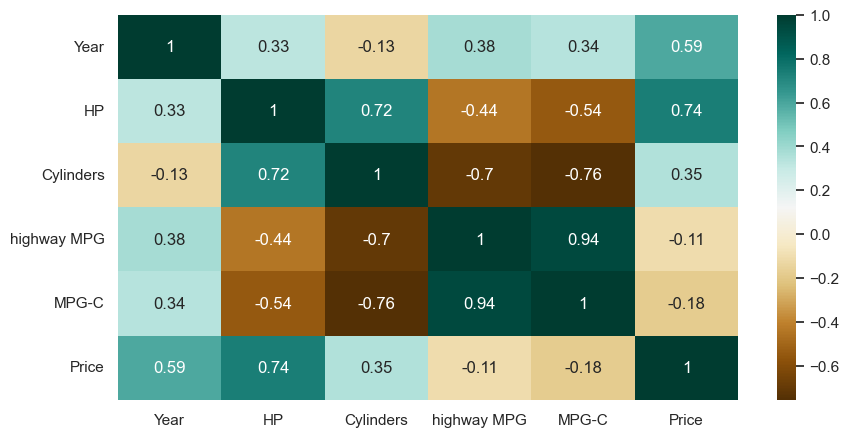

In [50]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

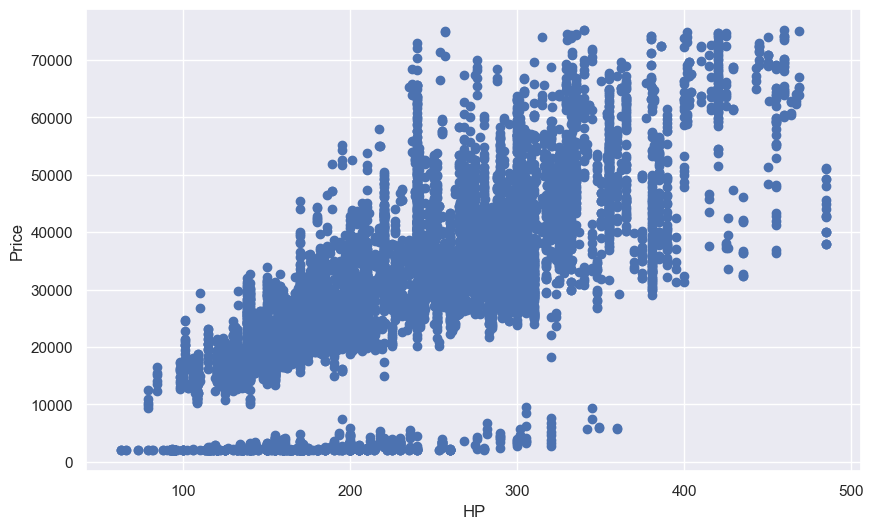

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA. There are many more yet to come but for now, this is more than enough idea as to how to perform a good EDA given any data sets. Stay tuned for more updates.

Rabbi Islam Yeasin Bhambani
Engineer of Computer Science
IBM Certified Professional Data Scientist
Founder,Yeasin Arena Excelytics and Explication Limited
CS50 Certified, Harvard Extension School, Harvard University
https://rabbi.yeasin-arena.com